## Detect Rambu
This is the 2nd file of myproject Indonesia Traffic Sign Detection. Please see my 1st file which is "detect rambu - EDA.ipynb". Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. The goal of my current project is to detect person from a collection of images and videos and then create a bounding box to state where the object is located. I am using Yolov8 as model architecture with ultralytics library. Dataset obtained from paper "Implementasi Deep Learning untuk Object Detection Menggunakan Algoritma YOLO (You Only Look Once) pada Rambu Lalu Lintas di Indonesia" by Adhy Wiranto Sudjana. Please see my 1st file to collect dataset and EDA.

### 1. Install and import ultralytics library first

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 11.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [3]:
from ultralytics import YOLO
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 0.2.8>=0.2.5


In [4]:
!pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno, ultralytics


### 2. Get the dataset
Link dataset : https://drive.google.com/file/d/1J4KKEuoQS4_du65uQ1lK4l4o5_yUFeAF/view?usp=sharing

Put and unzip the dataset to your directory. Directory structure should be like this :
- Detect Rambu
  - images
  - labels
  - dataset.yaml
  

In [5]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd "/content/drive/MyDrive/Final Project"

/content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project


In [ ]:
## Assume you put the dataset file in "/content/drive/MyDrive/Colab Notebooks/Dataset_Rambu/Detect Rambu-20240612T125847Z-001.zip"
## unzip it and it will unzip in current directory

!unzip "/content/drive/MyDrive/Final Project/Detect Rambu-20240612T125847Z-001.zip"
!pwd

Archive:  /content/drive/MyDrive/Final Project/Detect Rambu-20240612T125847Z-001.zip
  inflating: Detect Rambu/labels/train.cache  
  inflating: Detect Rambu/dataset.yaml  
  inflating: Detect Rambu/labels/val.cache  
  inflating: Detect Rambu/images/train/peringatan pintu perlintasan kereta api (14).jpg  
  inflating: Detect Rambu/images/train/larangan belok kanan (35).jpg  
  inflating: Detect Rambu/images/train/larangan belok kiri (1).jpg  
  inflating: Detect Rambu/images/train/petunjuk lokasi pemberhentian bus (5).jpg  
  inflating: Detect Rambu/images/train/larangan berhenti (67).jpg  
  inflating: Detect Rambu/images/train/larangan berjalan terus wajib berhenti sesaat (45).jpg  
  inflating: Detect Rambu/images/train/peringatan simpang tiga sisi kiri (11).jpg  
  inflating: Detect Rambu/images/train/larangan belok kiri (29).jpg  
  inflating: Detect Rambu/images/train/larangan belok kanan (55).jpg  
  inflating: Detect Rambu/images/train/peringatan banyak pejalan kaki menggunaka

In [ ]:
## change directory to your directory where images & labels are stored
%cd "/content/De"

/content/Detect Rambu


###2.1 Check Dataset
Number of files should be <br>
Jumlah Train / Val / Test Images : 1469 / 399 / 231 <br>
Jumlah Train / Val / Test Label : 1469 / 399 / 231

In [ ]:
import glob


f_train_img = glob.glob(f"images/train/*jpg")
f_val_img = glob.glob(f"images/val/*jpg")
f_test_img = glob.glob(f"images/test/*jpg")

f_train_label = glob.glob(f"labels/train/*txt")
f_val_label = glob.glob(f"labels/val/*txt")
f_test_label = glob.glob(f"labels/test/*txt")

print(f"Jumlah Train / Val / Test Images : {len(f_train_img)} / {len(f_val_img)} / {len(f_test_img)}")
print(f"Jumlah Train / Val / Test Label : {len(f_train_label)} / {len(f_val_label)} / {len(f_test_label)}")

Jumlah Train / Val / Test Images : 1469 / 399 / 231
Jumlah Train / Val / Test Label : 1469 / 399 / 231


### 3. Get the pre-trained Yolov8
URL : https://docs.ultralytics.com/tasks/detect/ <br>
There are several pretrained files for detection. First row is the fastest but the result is not to good. I'm using "yolov8m.pt"<img src="yolo pretrained.png">

In [ ]:
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8l.pt
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x.pt

In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt

In [ ]:
!ls

'Detect Rambu'				 'detect rambu - train-8s-Adam.ipynb'   yolov8s.pt
'Detect Rambu-20240612T125847Z-001.zip'  'detect rambu - train-8s-Auto.ipynb'


### 4. Use downloaded yolo as pre-trained model

In [ ]:
#%cd MyProject/detect_rambu
model = YOLO("yolov8s.pt")
model.train(data='/content/drive/MyDrive/Final Project/Detect Rambu/dataset.yaml', epochs=100, imgsz=640, device=0, batch=8)
!pwd

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Final Project/Detect Rambu/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 4.02MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.6MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/train... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:23<00:00, 62.00it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/val... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:04<00:00, 82.35it/s] 


val: New cache created: /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/val.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G     0.9909      3.685       1.22         17        640: 100%|██████████| 184/184 [00:53<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.81it/s]

                   all        399        429      0.487      0.565      0.604      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G     0.8906      1.756      1.106          6        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.93it/s]

                   all        399        429      0.719      0.747      0.801       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G     0.8686      1.368      1.075         13        640: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.69it/s]

                   all        399        429      0.686      0.756      0.754      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G     0.8698      1.191      1.072          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

                   all        399        429      0.773       0.82      0.864      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G     0.8679      1.084      1.072         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.35it/s]

                   all        399        429      0.848      0.857      0.905      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G     0.8099     0.9148      1.033          9        640: 100%|██████████| 184/184 [00:45<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.73it/s]

                   all        399        429      0.891       0.83      0.911      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G     0.7882     0.8788      1.021          6        640: 100%|██████████| 184/184 [00:52<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.80it/s]

                   all        399        429      0.873      0.841      0.884      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.38G     0.8082     0.8391      1.041         11        640: 100%|██████████| 184/184 [00:44<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]

                   all        399        429      0.851      0.867      0.915      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.38G     0.7868     0.7642      1.031          6        640: 100%|██████████| 184/184 [00:48<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.52it/s]

                   all        399        429      0.912      0.897       0.94      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G     0.7874     0.7778       1.03          6        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        399        429      0.905      0.895      0.936      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.38G     0.7683     0.7474      1.016         10        640: 100%|██████████| 184/184 [00:45<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

                   all        399        429      0.919      0.894      0.937      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.38G      0.758     0.7176      1.016         16        640: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]

                   all        399        429      0.923      0.904      0.949      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.39G     0.7559     0.6857      1.012          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]

                   all        399        429      0.927      0.905       0.94       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.41G     0.7487     0.6937      1.014         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.04it/s]

                   all        399        429       0.89       0.92      0.939      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.38G     0.7321     0.6509      1.004         14        640: 100%|██████████| 184/184 [00:44<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.55it/s]

                   all        399        429      0.939      0.891      0.957      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.39G     0.7162     0.6282     0.9979          9        640: 100%|██████████| 184/184 [00:45<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.86it/s]

                   all        399        429      0.927      0.916      0.942       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G      0.719     0.6128     0.9957          6        640: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.76it/s]

                   all        399        429       0.93      0.898      0.947      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.39G     0.7105     0.6114     0.9859          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]

                   all        399        429      0.879      0.901      0.916       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.38G      0.731     0.5951      1.001         12        640: 100%|██████████| 184/184 [00:45<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]

                   all        399        429      0.929      0.923      0.952      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G     0.7071     0.5913     0.9931         12        640: 100%|██████████| 184/184 [00:44<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.44it/s]

                   all        399        429      0.933      0.916      0.945      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.38G     0.6973     0.5567     0.9817          8        640: 100%|██████████| 184/184 [00:45<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all        399        429      0.926      0.912      0.961      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.38G     0.7044     0.5653     0.9899          6        640: 100%|██████████| 184/184 [00:53<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]

                   all        399        429      0.948      0.912      0.961      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.4G     0.6745     0.5663     0.9705          6        640: 100%|██████████| 184/184 [00:48<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]

                   all        399        429      0.961      0.901       0.96       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.39G     0.6848     0.5489      0.983         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.69it/s]

                   all        399        429      0.897      0.931      0.949      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.39G     0.6698     0.5389     0.9706          7        640: 100%|██████████| 184/184 [00:45<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.80it/s]

                   all        399        429      0.938      0.923      0.959      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.39G     0.6728     0.5368      0.974         10        640: 100%|██████████| 184/184 [00:44<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]

                   all        399        429      0.914      0.926      0.951      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.38G     0.6647     0.5212     0.9696         10        640: 100%|██████████| 184/184 [00:54<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]

                   all        399        429      0.951      0.943      0.967      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.38G     0.6609     0.5152     0.9674          6        640: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.43it/s]

                   all        399        429      0.953      0.947      0.972      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G     0.6572     0.5063     0.9687          9        640: 100%|██████████| 184/184 [00:44<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.39it/s]

                   all        399        429      0.964      0.932      0.964      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.39G     0.6321     0.4952     0.9564          8        640: 100%|██████████| 184/184 [00:45<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]

                   all        399        429      0.947      0.926      0.968      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.38G     0.6384      0.503     0.9592         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.75it/s]

                   all        399        429      0.939      0.922      0.957       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.39G     0.6382     0.4912     0.9643         11        640: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]

                   all        399        429      0.944      0.908      0.949      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.4G     0.6451     0.4905     0.9563          8        640: 100%|██████████| 184/184 [00:44<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.77it/s]

                   all        399        429      0.927      0.944      0.961      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.38G     0.6277     0.4931     0.9629         12        640: 100%|██████████| 184/184 [00:45<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.60it/s]

                   all        399        429      0.918      0.933      0.953      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.38G     0.6353     0.4644     0.9551         12        640: 100%|██████████| 184/184 [00:45<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]

                   all        399        429      0.958      0.925      0.956      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.4G     0.6207     0.4542     0.9509         11        640: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.26it/s]

                   all        399        429      0.942      0.908      0.954      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.39G     0.6232     0.4699     0.9557          9        640: 100%|██████████| 184/184 [00:48<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.58it/s]

                   all        399        429      0.957      0.924      0.959      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G     0.6044     0.4756     0.9537         16        640: 100%|██████████| 184/184 [00:45<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.36it/s]

                   all        399        429      0.947      0.921       0.96      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.6048     0.4399     0.9481         11        640: 100%|██████████| 184/184 [00:44<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.79it/s]

                   all        399        429      0.947      0.942      0.964       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G     0.6109     0.4553     0.9491          7        640: 100%|██████████| 184/184 [00:44<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.97it/s]

                   all        399        429      0.959      0.929      0.964      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.38G     0.6078     0.4532     0.9466          9        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.44it/s]

                   all        399        429      0.936      0.935      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.6136     0.4442     0.9476         15        640: 100%|██████████| 184/184 [00:46<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.40it/s]

                   all        399        429      0.941      0.928      0.959      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.5983      0.446     0.9477         10        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.74it/s]

                   all        399        429      0.968      0.938      0.965      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.38G     0.5825     0.4191     0.9388         13        640: 100%|██████████| 184/184 [00:46<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]

                   all        399        429      0.936      0.938      0.958      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.39G     0.5822     0.4261     0.9348         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]

                   all        399        429      0.945      0.915      0.954      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G      0.576     0.4047     0.9402          9        640: 100%|██████████| 184/184 [00:55<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]

                   all        399        429      0.962      0.946      0.968      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.39G     0.5815     0.4231     0.9448         10        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.54it/s]

                   all        399        429      0.937      0.943      0.969      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.38G     0.5729     0.4097     0.9413         10        640: 100%|██████████| 184/184 [00:44<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.88it/s]

                   all        399        429       0.95      0.922      0.957      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.38G     0.5757     0.4139     0.9398          6        640: 100%|██████████| 184/184 [00:44<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.81it/s]

                   all        399        429      0.959      0.937      0.969      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.38G     0.5617     0.4145     0.9327          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.43it/s]

                   all        399        429      0.965      0.921      0.961      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.39G     0.5698     0.4113     0.9347         11        640: 100%|██████████| 184/184 [00:51<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.37it/s]

                   all        399        429      0.933      0.943       0.96       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.39G     0.5797     0.4189     0.9398          9        640: 100%|██████████| 184/184 [00:43<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.94it/s]

                   all        399        429      0.954      0.941      0.963      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.38G     0.5562     0.3979     0.9343         12        640: 100%|██████████| 184/184 [00:44<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]

                   all        399        429      0.955       0.94      0.963      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.4G     0.5634     0.3999     0.9341         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]

                   all        399        429      0.948      0.939      0.957      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.38G     0.5594     0.4049      0.933         13        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.41it/s]

                   all        399        429      0.957      0.929       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.38G     0.5415     0.3907     0.9235          9        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all        399        429      0.967      0.927      0.965      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.39G     0.5345     0.3818     0.9291          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.08it/s]

                   all        399        429      0.959      0.926      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.38G     0.5445      0.372     0.9248         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.95it/s]

                   all        399        429      0.955      0.926      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.38G     0.5269      0.372     0.9229          9        640: 100%|██████████| 184/184 [00:44<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.76it/s]

                   all        399        429      0.952      0.935      0.957      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.38G      0.526     0.3667     0.9227          8        640: 100%|██████████| 184/184 [00:44<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        399        429      0.974      0.933      0.967       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.38G     0.5265     0.3753     0.9242          8        640: 100%|██████████| 184/184 [00:54<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]

                   all        399        429      0.963      0.935      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.39G     0.5193     0.3648     0.9153         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.82it/s]

                   all        399        429      0.973      0.926      0.963      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G      0.511     0.3515     0.9094         11        640: 100%|██████████| 184/184 [00:44<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.79it/s]

                   all        399        429       0.95      0.944      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.38G     0.5151     0.3596     0.9172         12        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        399        429      0.961      0.929       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G      0.515     0.3577      0.917         16        640: 100%|██████████| 184/184 [00:47<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.26it/s]

                   all        399        429      0.961      0.928      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.41G     0.5057     0.3633      0.909          7        640: 100%|██████████| 184/184 [00:48<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]

                   all        399        429      0.944      0.943      0.963      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.4G     0.4914     0.3435      0.912          8        640: 100%|██████████| 184/184 [00:44<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.02it/s]

                   all        399        429      0.964      0.914      0.957      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.38G     0.4897     0.3393     0.9128          6        640: 100%|██████████| 184/184 [00:45<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]

                   all        399        429      0.958       0.93      0.959       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.39G      0.501      0.343     0.9164         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.59it/s]

                   all        399        429      0.957      0.935      0.966      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.39G     0.5007     0.3386     0.9055          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all        399        429      0.949      0.942      0.967      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.4962     0.3461     0.9116         10        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.31it/s]

                   all        399        429      0.957      0.937      0.963      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.39G     0.4891      0.333     0.9113         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]

                   all        399        429      0.957      0.929      0.963      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G     0.4856     0.3305     0.9075         11        640: 100%|██████████| 184/184 [00:45<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.82it/s]

                   all        399        429      0.946      0.936      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.4G     0.4787     0.3252     0.9068         13        640: 100%|██████████| 184/184 [00:43<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.57it/s]

                   all        399        429      0.951      0.941       0.96      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.38G     0.4747      0.329     0.9021         14        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]

                   all        399        429      0.959      0.931      0.962      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.38G     0.4706      0.331     0.9058         12        640: 100%|██████████| 184/184 [00:45<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]

                   all        399        429      0.954      0.933      0.964      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.4681     0.3207      0.903         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        399        429      0.967      0.923       0.96      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.38G      0.468     0.3242     0.9055         15        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.92it/s]

                   all        399        429      0.954      0.936      0.963       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.38G     0.4681     0.3224     0.9039         10        640: 100%|██████████| 184/184 [00:44<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.69it/s]

                   all        399        429      0.961      0.939      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.38G      0.459     0.3219     0.9017         13        640: 100%|██████████| 184/184 [00:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]

                   all        399        429      0.962      0.941      0.965       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.38G     0.4459     0.3012     0.8951          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.92it/s]

                   all        399        429      0.962      0.947      0.968      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.38G     0.4526      0.313     0.8947         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]

                   all        399        429      0.947       0.94      0.964      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.4G     0.4486     0.3097     0.8956         10        640: 100%|██████████| 184/184 [00:44<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.54it/s]

                   all        399        429      0.964      0.916      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.38G     0.4527     0.3005     0.8978          8        640: 100%|██████████| 184/184 [00:44<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.57it/s]

                   all        399        429      0.957      0.942      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.4379      0.303      0.894          8        640: 100%|██████████| 184/184 [00:53<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]

                   all        399        429      0.959      0.941      0.967       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.4G     0.4389     0.2986     0.8885         11        640: 100%|██████████| 184/184 [00:48<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.40it/s]

                   all        399        429      0.969      0.936      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.4G     0.4314     0.2984     0.8943          6        640: 100%|██████████| 184/184 [00:44<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.44it/s]

                   all        399        429      0.958      0.944      0.968      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.38G     0.4245     0.2871     0.8864         11        640: 100%|██████████| 184/184 [00:44<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.88it/s]

                   all        399        429      0.942      0.947      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.4G     0.4291     0.2993      0.892          8        640: 100%|██████████| 184/184 [00:44<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.39it/s]

                   all        399        429      0.948       0.95      0.967      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.39G     0.4369     0.2956     0.8965          8        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]

                   all        399        429      0.958      0.947       0.97      0.841


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.39G     0.3623     0.2026      0.831          5        640: 100%|██████████| 184/184 [00:48<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]

                   all        399        429      0.962      0.941      0.967      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.39G     0.3514     0.1958     0.8211          7        640: 100%|██████████| 184/184 [00:44<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]

                   all        399        429      0.955      0.943      0.967      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.39G     0.3509     0.1938     0.8223          5        640: 100%|██████████| 184/184 [00:43<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]

                   all        399        429      0.956      0.934      0.967      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.39G     0.3492     0.1936     0.8156          5        640: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]

                   all        399        429      0.959      0.936       0.97      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.38G     0.3404     0.1897     0.8153          5        640: 100%|██████████| 184/184 [00:45<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.41it/s]

                   all        399        429      0.951       0.94      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.39G     0.3358     0.1862     0.8189          5        640: 100%|██████████| 184/184 [00:42<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        399        429      0.961      0.935      0.969       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.38G     0.3316      0.181     0.8112          5        640: 100%|██████████| 184/184 [00:43<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]

                   all        399        429      0.967      0.932      0.969      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.38G     0.3275     0.1839     0.8153          5        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.88it/s]

                   all        399        429      0.963      0.935       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.39G     0.3301     0.1823      0.821          5        640: 100%|██████████| 184/184 [00:51<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.95it/s]

                   all        399        429      0.968      0.935      0.969      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.38G     0.3224     0.1777     0.8115          5        640: 100%|██████████| 184/184 [00:43<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.78it/s]

                   all        399        429       0.96       0.94      0.969      0.841



100 epochs completed in 1.572 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


                   all        399        429      0.958      0.944      0.968      0.844
     larangan berhenti         19         19      0.967          1      0.995      0.954
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19          1      0.986      0.995      0.936
       larangan parkir         19         20        0.9       0.95      0.977      0.896
           lampu hijau         19         35      0.991      0.886      0.978      0.771
          lampu kuning         19         19      0.823      0.684      0.816      0.672
           lampu merah         19         19      0.912      0.737      0.821      0.641
  larangan belok kanan         19         20      0.983        0.9      0.975      0.934
   larangan belok kiri         19         23      0.819          1      0.993      0.906
larangan berjalan terus wajib berhenti sesaat         19         23       0.91      0.957      0.957      0.797
larangan memutar balik         19         19        

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
!ls

'Detect Rambu'				 'detect rambu - train-8s-Auto.ipynb'   yolov8s.pt
'Detect Rambu-20240612T125847Z-001.zip'   runs
'detect rambu - train-8s-Adam.ipynb'	  yolov8n.pt


### 5. Train the dataset with 100 epoch, imagesize 640 and batch 8

In [ ]:
## auto
##model.train(data='./dataset.yaml', epochs=100, imgsz=640, device=0, batch=8)

## custom optim & lr
model.train(data='/content/Detect Rambu/dataset.yaml', epochs=100, imgsz=640, device=0, batch=8)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Detect Rambu/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 112MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/Detect Rambu/labels/train... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<00:00, 2114.75it/s]


train: New cache created: /content/Detect Rambu/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Detect Rambu/labels/val... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<00:00, 917.59it/s] 


val: New cache created: /content/Detect Rambu/labels/val.cache
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G     0.9909      3.685       1.22         17        640: 100%|██████████| 184/184 [00:42<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.71it/s]

                   all        399        429      0.487      0.565      0.604      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G     0.8906      1.756      1.106          6        640: 100%|██████████| 184/184 [00:38<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]

                   all        399        429      0.719      0.747      0.801       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G     0.8686      1.368      1.075         13        640: 100%|██████████| 184/184 [00:42<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.14it/s]

                   all        399        429      0.686      0.756      0.754      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G     0.8698      1.191      1.072          9        640: 100%|██████████| 184/184 [00:38<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]

                   all        399        429      0.773       0.82      0.864      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G     0.8679      1.084      1.072         15        640: 100%|██████████| 184/184 [00:38<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.13it/s]

                   all        399        429      0.848      0.857      0.905      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G     0.8099     0.9148      1.033          9        640: 100%|██████████| 184/184 [00:36<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]

                   all        399        429      0.891       0.83      0.911      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G     0.7882     0.8788      1.021          6        640: 100%|██████████| 184/184 [00:38<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.19it/s]

                   all        399        429      0.873      0.841      0.884      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.39G     0.8082     0.8391      1.041         11        640: 100%|██████████| 184/184 [00:38<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.49it/s]

                   all        399        429      0.851      0.867      0.915      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.38G     0.7868     0.7642      1.031          6        640: 100%|██████████| 184/184 [00:39<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]

                   all        399        429      0.912      0.897       0.94      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G     0.7874     0.7778       1.03          6        640: 100%|██████████| 184/184 [00:37<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.59it/s]

                   all        399        429      0.905      0.895      0.936      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.38G     0.7683     0.7474      1.016         10        640: 100%|██████████| 184/184 [00:38<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.13it/s]

                   all        399        429      0.919      0.894      0.937      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.38G      0.758     0.7176      1.016         16        640: 100%|██████████| 184/184 [00:37<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.85it/s]

                   all        399        429      0.923      0.904      0.949      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G     0.7559     0.6857      1.012          7        640: 100%|██████████| 184/184 [00:37<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]

                   all        399        429      0.927      0.905       0.94       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.39G     0.7487     0.6937      1.014         11        640: 100%|██████████| 184/184 [00:38<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.11it/s]

                   all        399        429       0.89       0.92      0.939      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.39G     0.7321     0.6509      1.004         14        640: 100%|██████████| 184/184 [00:42<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.20it/s]

                   all        399        429      0.939      0.891      0.957      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.38G     0.7162     0.6282     0.9979          9        640: 100%|██████████| 184/184 [00:38<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]

                   all        399        429      0.927      0.916      0.942       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G      0.719     0.6128     0.9957          6        640: 100%|██████████| 184/184 [00:37<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]

                   all        399        429       0.93      0.898      0.947      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.38G     0.7105     0.6114     0.9859          8        640: 100%|██████████| 184/184 [00:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.14it/s]

                   all        399        429      0.879      0.901      0.916       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.38G      0.731     0.5951      1.001         12        640: 100%|██████████| 184/184 [00:37<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.17it/s]

                   all        399        429      0.929      0.923      0.952      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G     0.7071     0.5913     0.9931         12        640: 100%|██████████| 184/184 [00:38<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]

                   all        399        429      0.933      0.916      0.945      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.39G     0.6973     0.5567     0.9817          8        640: 100%|██████████| 184/184 [00:38<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.29it/s]

                   all        399        429      0.926      0.912      0.961      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.38G     0.7044     0.5653     0.9899          6        640: 100%|██████████| 184/184 [00:36<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]

                   all        399        429      0.948      0.912      0.961      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.38G     0.6745     0.5663     0.9705          6        640: 100%|██████████| 184/184 [00:37<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.34it/s]

                   all        399        429      0.961      0.901       0.96       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.4G     0.6848     0.5489      0.983         12        640: 100%|██████████| 184/184 [00:38<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.22it/s]

                   all        399        429      0.897      0.931      0.949      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.39G     0.6698     0.5389     0.9706          7        640: 100%|██████████| 184/184 [00:37<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]

                   all        399        429      0.938      0.923      0.959      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.38G     0.6728     0.5368      0.974         10        640: 100%|██████████| 184/184 [00:36<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.99it/s]

                   all        399        429      0.914      0.926      0.951      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.38G     0.6647     0.5212     0.9696         10        640: 100%|██████████| 184/184 [00:41<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.29it/s]

                   all        399        429      0.951      0.943      0.967      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.39G     0.6609     0.5152     0.9674          6        640: 100%|██████████| 184/184 [00:38<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.15it/s]

                   all        399        429      0.953      0.947      0.972      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G     0.6572     0.5063     0.9687          9        640: 100%|██████████| 184/184 [00:38<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]

                   all        399        429      0.964      0.932      0.964      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.38G     0.6321     0.4952     0.9564          8        640: 100%|██████████| 184/184 [00:37<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.53it/s]

                   all        399        429      0.947      0.926      0.968      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.41G     0.6384      0.503     0.9592         15        640: 100%|██████████| 184/184 [00:39<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.16it/s]

                   all        399        429      0.939      0.922      0.957       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.38G     0.6382     0.4912     0.9643         11        640: 100%|██████████| 184/184 [00:38<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]

                   all        399        429      0.944      0.908      0.949      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.41G     0.6451     0.4905     0.9563          8        640: 100%|██████████| 184/184 [00:40<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]

                   all        399        429      0.927      0.944      0.961      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.38G     0.6277     0.4931     0.9629         12        640: 100%|██████████| 184/184 [00:37<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.09it/s]

                   all        399        429      0.918      0.933      0.953      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.39G     0.6353     0.4644     0.9551         12        640: 100%|██████████| 184/184 [00:37<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        399        429      0.958      0.925      0.956      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.39G     0.6207     0.4542     0.9509         11        640: 100%|██████████| 184/184 [00:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.24it/s]

                   all        399        429      0.942      0.908      0.954      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.39G     0.6232     0.4699     0.9557          9        640: 100%|██████████| 184/184 [00:38<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.27it/s]

                   all        399        429      0.957      0.924      0.959      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G     0.6044     0.4756     0.9537         16        640: 100%|██████████| 184/184 [00:39<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.03it/s]

                   all        399        429      0.947      0.921       0.96      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.6048     0.4399     0.9481         11        640: 100%|██████████| 184/184 [00:36<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]

                   all        399        429      0.947      0.942      0.964       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G     0.6109     0.4553     0.9491          7        640: 100%|██████████| 184/184 [00:37<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]

                   all        399        429      0.959      0.929      0.964      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.39G     0.6078     0.4532     0.9466          9        640: 100%|██████████| 184/184 [00:38<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]

                   all        399        429      0.936      0.935      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.4G     0.6136     0.4442     0.9476         15        640: 100%|██████████| 184/184 [00:37<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.88it/s]

                   all        399        429      0.941      0.928      0.959      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.5983      0.446     0.9477         10        640: 100%|██████████| 184/184 [00:36<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]

                   all        399        429      0.968      0.938      0.965      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.38G     0.5825     0.4191     0.9388         13        640: 100%|██████████| 184/184 [00:40<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all        399        429      0.936      0.938      0.958      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.39G     0.5822     0.4261     0.9348         15        640: 100%|██████████| 184/184 [00:42<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.41it/s]

                   all        399        429      0.945      0.915      0.954      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.39G      0.576     0.4047     0.9402          9        640: 100%|██████████| 184/184 [00:40<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]

                   all        399        429      0.962      0.946      0.968      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.38G     0.5815     0.4231     0.9448         10        640: 100%|██████████| 184/184 [00:42<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]

                   all        399        429      0.937      0.943      0.969      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.39G     0.5729     0.4097     0.9413         10        640: 100%|██████████| 184/184 [00:41<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]

                   all        399        429       0.95      0.922      0.957      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.38G     0.5757     0.4139     0.9398          6        640: 100%|██████████| 184/184 [00:39<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]

                   all        399        429      0.959      0.937      0.969      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.38G     0.5617     0.4145     0.9327          6        640: 100%|██████████| 184/184 [00:42<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]

                   all        399        429      0.965      0.921      0.961      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.4G     0.5698     0.4113     0.9347         11        640: 100%|██████████| 184/184 [00:39<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]

                   all        399        429      0.933      0.943       0.96       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.38G     0.5797     0.4189     0.9398          9        640: 100%|██████████| 184/184 [00:39<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.55it/s]

                   all        399        429      0.954      0.941      0.963      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.38G     0.5562     0.3979     0.9343         12        640: 100%|██████████| 184/184 [00:37<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]

                   all        399        429      0.955       0.94      0.963      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.38G     0.5634     0.3999     0.9341         10        640: 100%|██████████| 184/184 [00:37<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]

                   all        399        429      0.948      0.939      0.957      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.38G     0.5594     0.4049      0.933         13        640: 100%|██████████| 184/184 [00:38<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]

                   all        399        429      0.957      0.929       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.38G     0.5415     0.3907     0.9235          9        640: 100%|██████████| 184/184 [00:41<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]

                   all        399        429      0.967      0.927      0.965      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.39G     0.5345     0.3818     0.9291          7        640: 100%|██████████| 184/184 [00:37<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]

                   all        399        429      0.959      0.926      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.38G     0.5445      0.372     0.9248         10        640: 100%|██████████| 184/184 [00:37<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]

                   all        399        429      0.955      0.926      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.4G     0.5269      0.372     0.9229          9        640: 100%|██████████| 184/184 [00:38<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.26it/s]

                   all        399        429      0.952      0.935      0.957      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.38G      0.526     0.3667     0.9227          8        640: 100%|██████████| 184/184 [00:38<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.21it/s]

                   all        399        429      0.974      0.933      0.967       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.38G     0.5265     0.3753     0.9242          8        640: 100%|██████████| 184/184 [00:39<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]

                   all        399        429      0.963      0.935      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.39G     0.5193     0.3648     0.9153         14        640: 100%|██████████| 184/184 [00:37<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]

                   all        399        429      0.973      0.926      0.963      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G      0.511     0.3515     0.9094         11        640: 100%|██████████| 184/184 [00:38<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.16it/s]

                   all        399        429       0.95      0.944      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.4G     0.5151     0.3596     0.9172         12        640: 100%|██████████| 184/184 [00:38<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]

                   all        399        429      0.961      0.929       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G      0.515     0.3577      0.917         16        640: 100%|██████████| 184/184 [00:38<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.50it/s]

                   all        399        429      0.961      0.928      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.39G     0.5057     0.3633      0.909          7        640: 100%|██████████| 184/184 [00:37<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]

                   all        399        429      0.944      0.943      0.963      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.38G     0.4914     0.3435      0.912          8        640: 100%|██████████| 184/184 [00:41<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.18it/s]

                   all        399        429      0.964      0.914      0.957      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.38G     0.4897     0.3393     0.9128          6        640: 100%|██████████| 184/184 [00:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.22it/s]

                   all        399        429      0.958       0.93      0.959       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.4G      0.501      0.343     0.9164         10        640: 100%|██████████| 184/184 [00:38<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        399        429      0.957      0.935      0.966      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G     0.5007     0.3386     0.9055          9        640: 100%|██████████| 184/184 [00:37<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]

                   all        399        429      0.949      0.942      0.967      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.4962     0.3461     0.9116         10        640: 100%|██████████| 184/184 [00:37<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]

                   all        399        429      0.957      0.937      0.963      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.38G     0.4891      0.333     0.9113         13        640: 100%|██████████| 184/184 [00:38<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.25it/s]

                   all        399        429      0.957      0.929      0.963      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G     0.4856     0.3305     0.9075         11        640: 100%|██████████| 184/184 [00:41<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.66it/s]

                   all        399        429      0.946      0.936      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.38G     0.4787     0.3252     0.9068         13        640: 100%|██████████| 184/184 [00:37<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]

                   all        399        429      0.951      0.941       0.96      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.38G     0.4747      0.329     0.9021         14        640: 100%|██████████| 184/184 [00:37<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.77it/s]

                   all        399        429      0.959      0.931      0.962      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.39G     0.4706      0.331     0.9058         12        640: 100%|██████████| 184/184 [00:38<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]

                   all        399        429      0.954      0.933      0.964      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.4681     0.3207      0.903         11        640: 100%|██████████| 184/184 [00:39<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.12it/s]

                   all        399        429      0.967      0.923       0.96      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.38G      0.468     0.3242     0.9055         15        640: 100%|██████████| 184/184 [00:37<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]

                   all        399        429      0.954      0.936      0.963       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.39G     0.4681     0.3224     0.9039         10        640: 100%|██████████| 184/184 [00:40<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.55it/s]

                   all        399        429      0.961      0.939      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.38G      0.459     0.3219     0.9017         13        640: 100%|██████████| 184/184 [00:39<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.18it/s]

                   all        399        429      0.962      0.941      0.965       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.4G     0.4459     0.3012     0.8951          7        640: 100%|██████████| 184/184 [00:39<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]

                   all        399        429      0.962      0.947      0.968      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.38G     0.4526      0.313     0.8947         13        640: 100%|██████████| 184/184 [00:37<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]

                   all        399        429      0.947       0.94      0.964      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.39G     0.4486     0.3097     0.8956         10        640: 100%|██████████| 184/184 [00:36<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        399        429      0.964      0.916      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.39G     0.4527     0.3005     0.8978          8        640: 100%|██████████| 184/184 [00:37<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]

                   all        399        429      0.957      0.942      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.4379      0.303      0.894          8        640: 100%|██████████| 184/184 [00:41<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.20it/s]

                   all        399        429      0.959      0.941      0.967       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.38G     0.4389     0.2986     0.8885         11        640: 100%|██████████| 184/184 [00:38<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.20it/s]

                   all        399        429      0.969      0.936      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G     0.4314     0.2984     0.8943          6        640: 100%|██████████| 184/184 [00:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        399        429      0.958      0.944      0.968      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.39G     0.4245     0.2871     0.8864         11        640: 100%|██████████| 184/184 [00:36<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]

                   all        399        429      0.942      0.947      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.4291     0.2993      0.892          8        640: 100%|██████████| 184/184 [00:36<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]

                   all        399        429      0.948       0.95      0.967      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.38G     0.4369     0.2956     0.8965          8        640: 100%|██████████| 184/184 [00:38<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]

                   all        399        429      0.958      0.947       0.97      0.841


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.38G     0.3623     0.2026      0.831          5        640: 100%|██████████| 184/184 [00:39<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]

                   all        399        429      0.962      0.941      0.967      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.38G     0.3514     0.1958     0.8211          7        640: 100%|██████████| 184/184 [00:35<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        399        429      0.955      0.943      0.967      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.38G     0.3509     0.1938     0.8223          5        640: 100%|██████████| 184/184 [00:35<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]

                   all        399        429      0.956      0.934      0.967      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.38G     0.3492     0.1936     0.8156          5        640: 100%|██████████| 184/184 [00:37<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.82it/s]

                   all        399        429      0.959      0.936       0.97      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.38G     0.3404     0.1897     0.8153          5        640: 100%|██████████| 184/184 [00:37<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.12it/s]

                   all        399        429      0.951       0.94      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.38G     0.3358     0.1862     0.8189          5        640: 100%|██████████| 184/184 [00:39<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all        399        429      0.961      0.935      0.969       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.39G     0.3316      0.181     0.8112          5        640: 100%|██████████| 184/184 [00:35<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.29it/s]

                   all        399        429      0.967      0.932      0.969      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.38G     0.3275     0.1839     0.8153          5        640: 100%|██████████| 184/184 [00:35<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.40it/s]

                   all        399        429      0.963      0.935       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.38G     0.3301     0.1823      0.821          5        640: 100%|██████████| 184/184 [00:36<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.74it/s]

                   all        399        429      0.968      0.935      0.969      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.38G     0.3224     0.1777     0.8115          5        640: 100%|██████████| 184/184 [00:37<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.19it/s]

                   all        399        429       0.96       0.94      0.969      0.841



100 epochs completed in 1.273 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]


                   all        399        429      0.958      0.944      0.968      0.844
     larangan berhenti         19         19      0.967          1      0.995      0.954
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19          1      0.986      0.995      0.936
       larangan parkir         19         20        0.9       0.95      0.977      0.896
           lampu hijau         19         35      0.991      0.886      0.978      0.771
          lampu kuning         19         19      0.823      0.684      0.816      0.672
           lampu merah         19         19      0.912      0.737      0.821      0.641
  larangan belok kanan         19         20      0.983        0.9      0.975      0.934
   larangan belok kiri         19         23      0.819          1      0.993      0.906
larangan berjalan terus wajib berhenti sesaat         19         23       0.91      0.957      0.957      0.797
larangan memutar balik         19         19        

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791a228d22c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
!cp -pr "runs" "/content/drive/MyDrive/Colab Notebooks/Dataset_Rambu/"

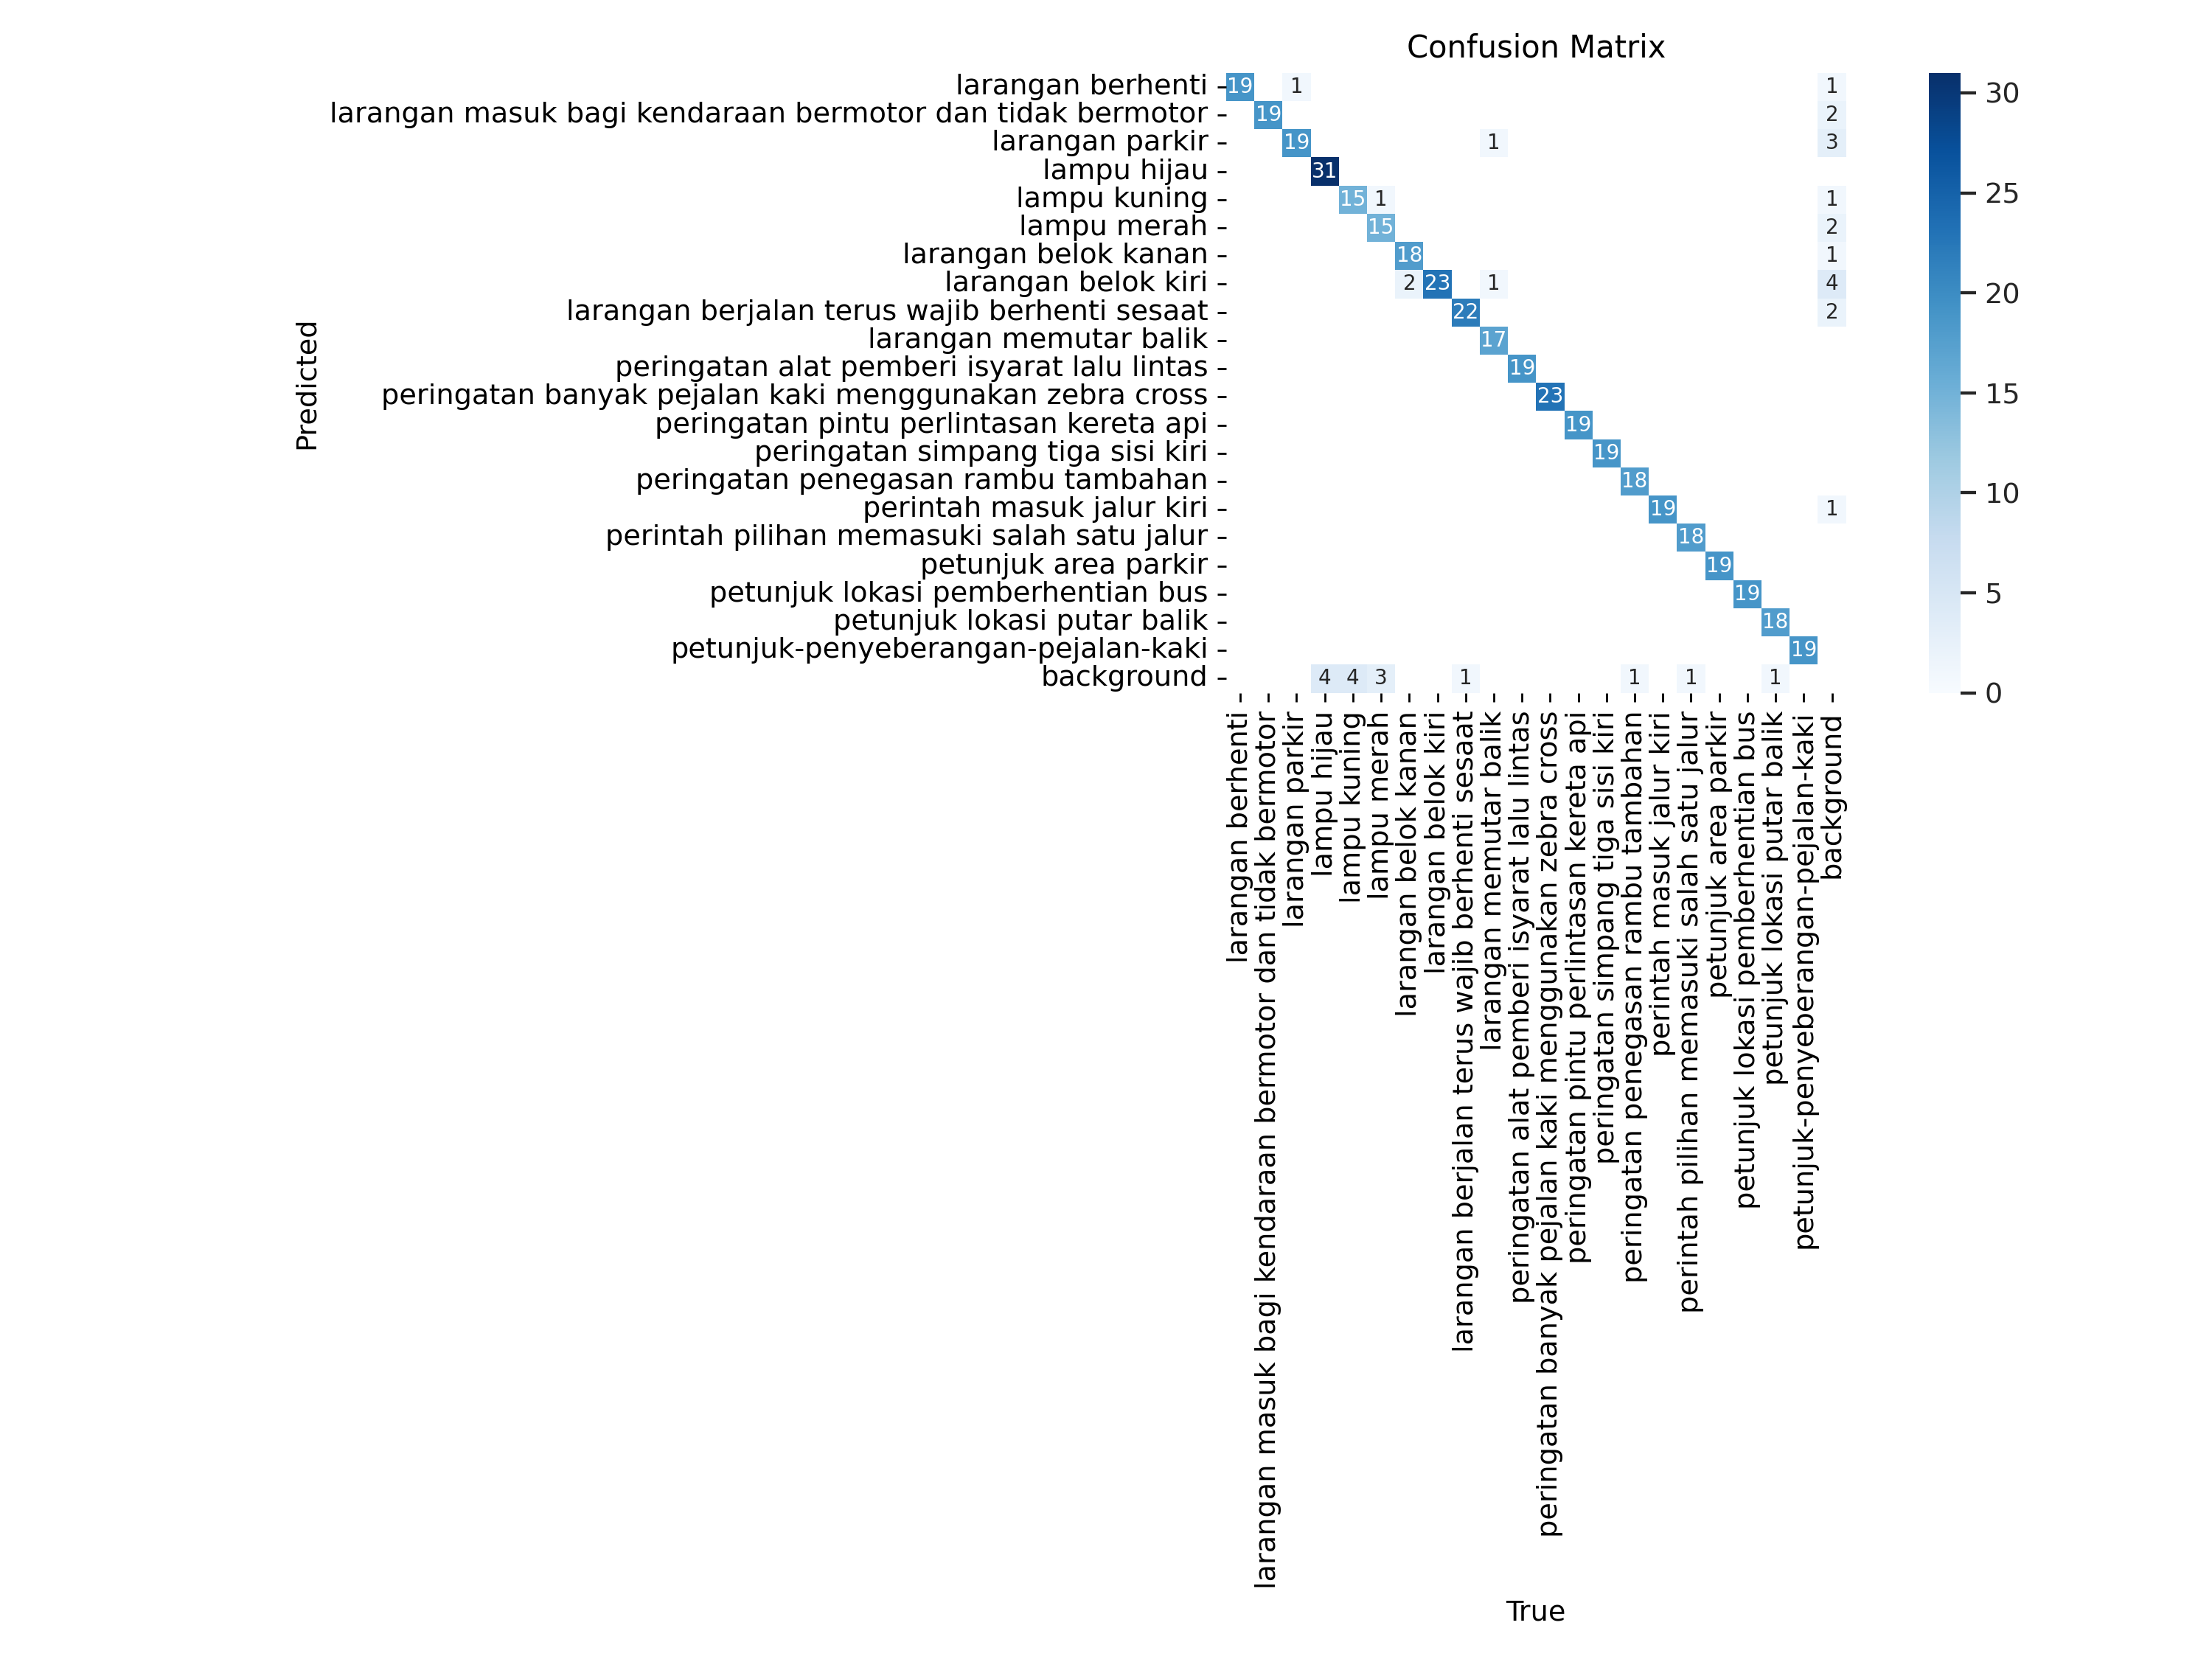

In [ ]:
Image(filename='/content/Detect Rambu/runs/detect/train4/confusion_matrix.png', width=800)

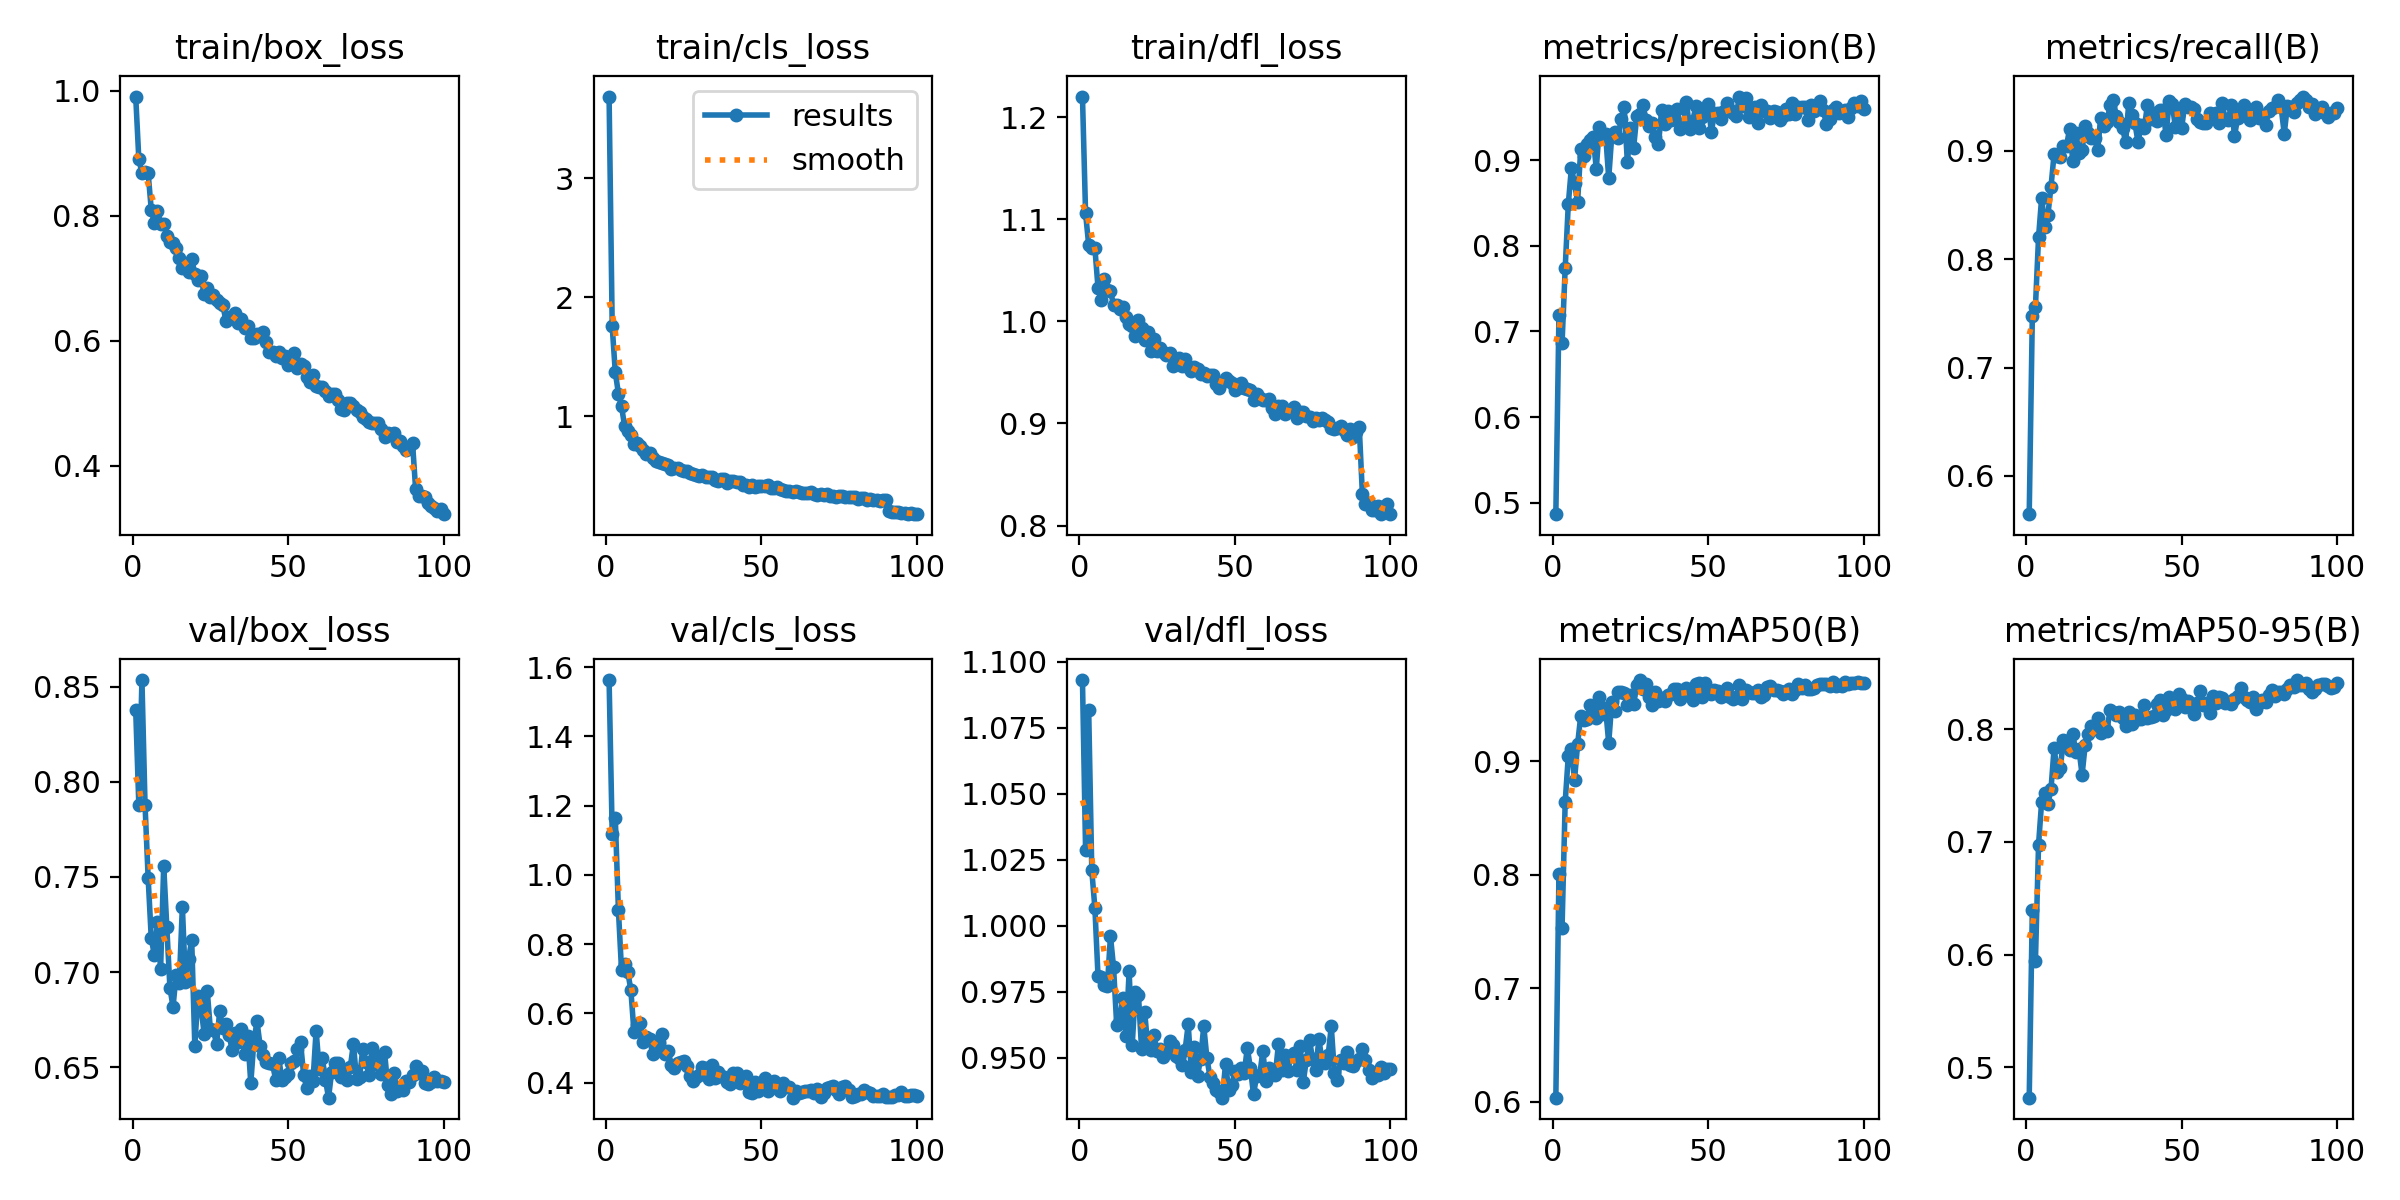

In [ ]:
Image(filename='/content/Detect Rambu/runs/detect/train4/results.png')

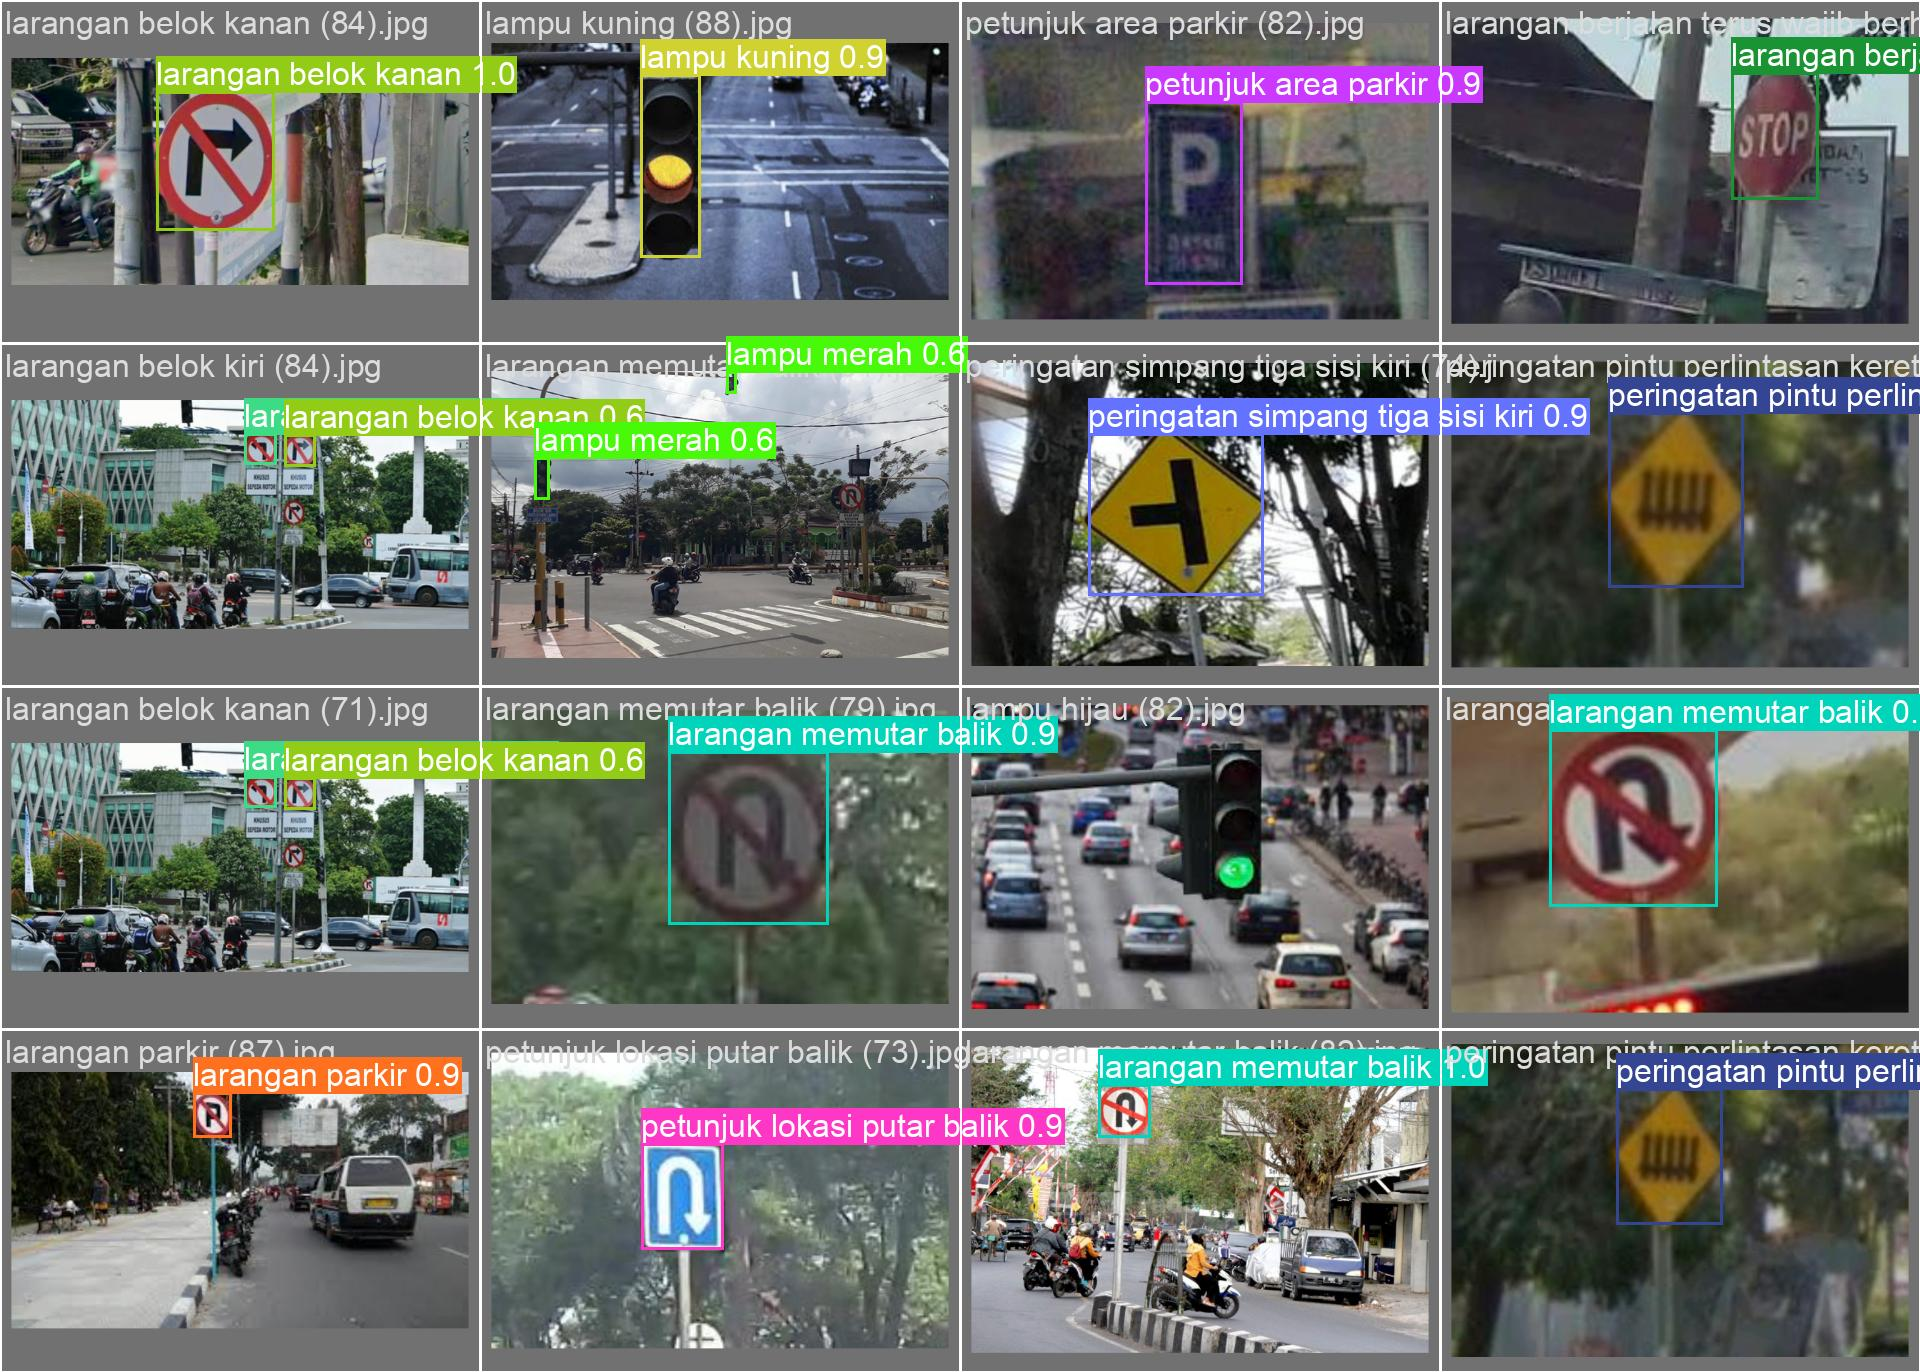

In [ ]:
Image(filename=f'runs/detect/train2/val_batch0_pred.jpg', width=1024)

### Model Evaluation with Test Data

In [7]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Final Project/runs/detect/train2/weights/best.pt' data='/content/drive/MyDrive/Final Project/Detect Rambu/dataset_for_testing.yaml'

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 14.8MB/s]
val: Scanning /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/test.cache... 231 images, 0 backgrounds, 0 corrupt: 100% 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:13<00:00,  1.14it/s]
                   all        231        242      0.977       0.96      0.984       0.85
     larangan berhenti         11         11      0.911      0.934       0.98      0.901
larangan masuk bagi kendaraan bermotor dan tidak bermotor         11         11      0.984          1      0.995      0.935
       larangan parkir         11         14      0.994      0.786      0.976      0.845
           lampu hijau         11         12       0.92          1      0

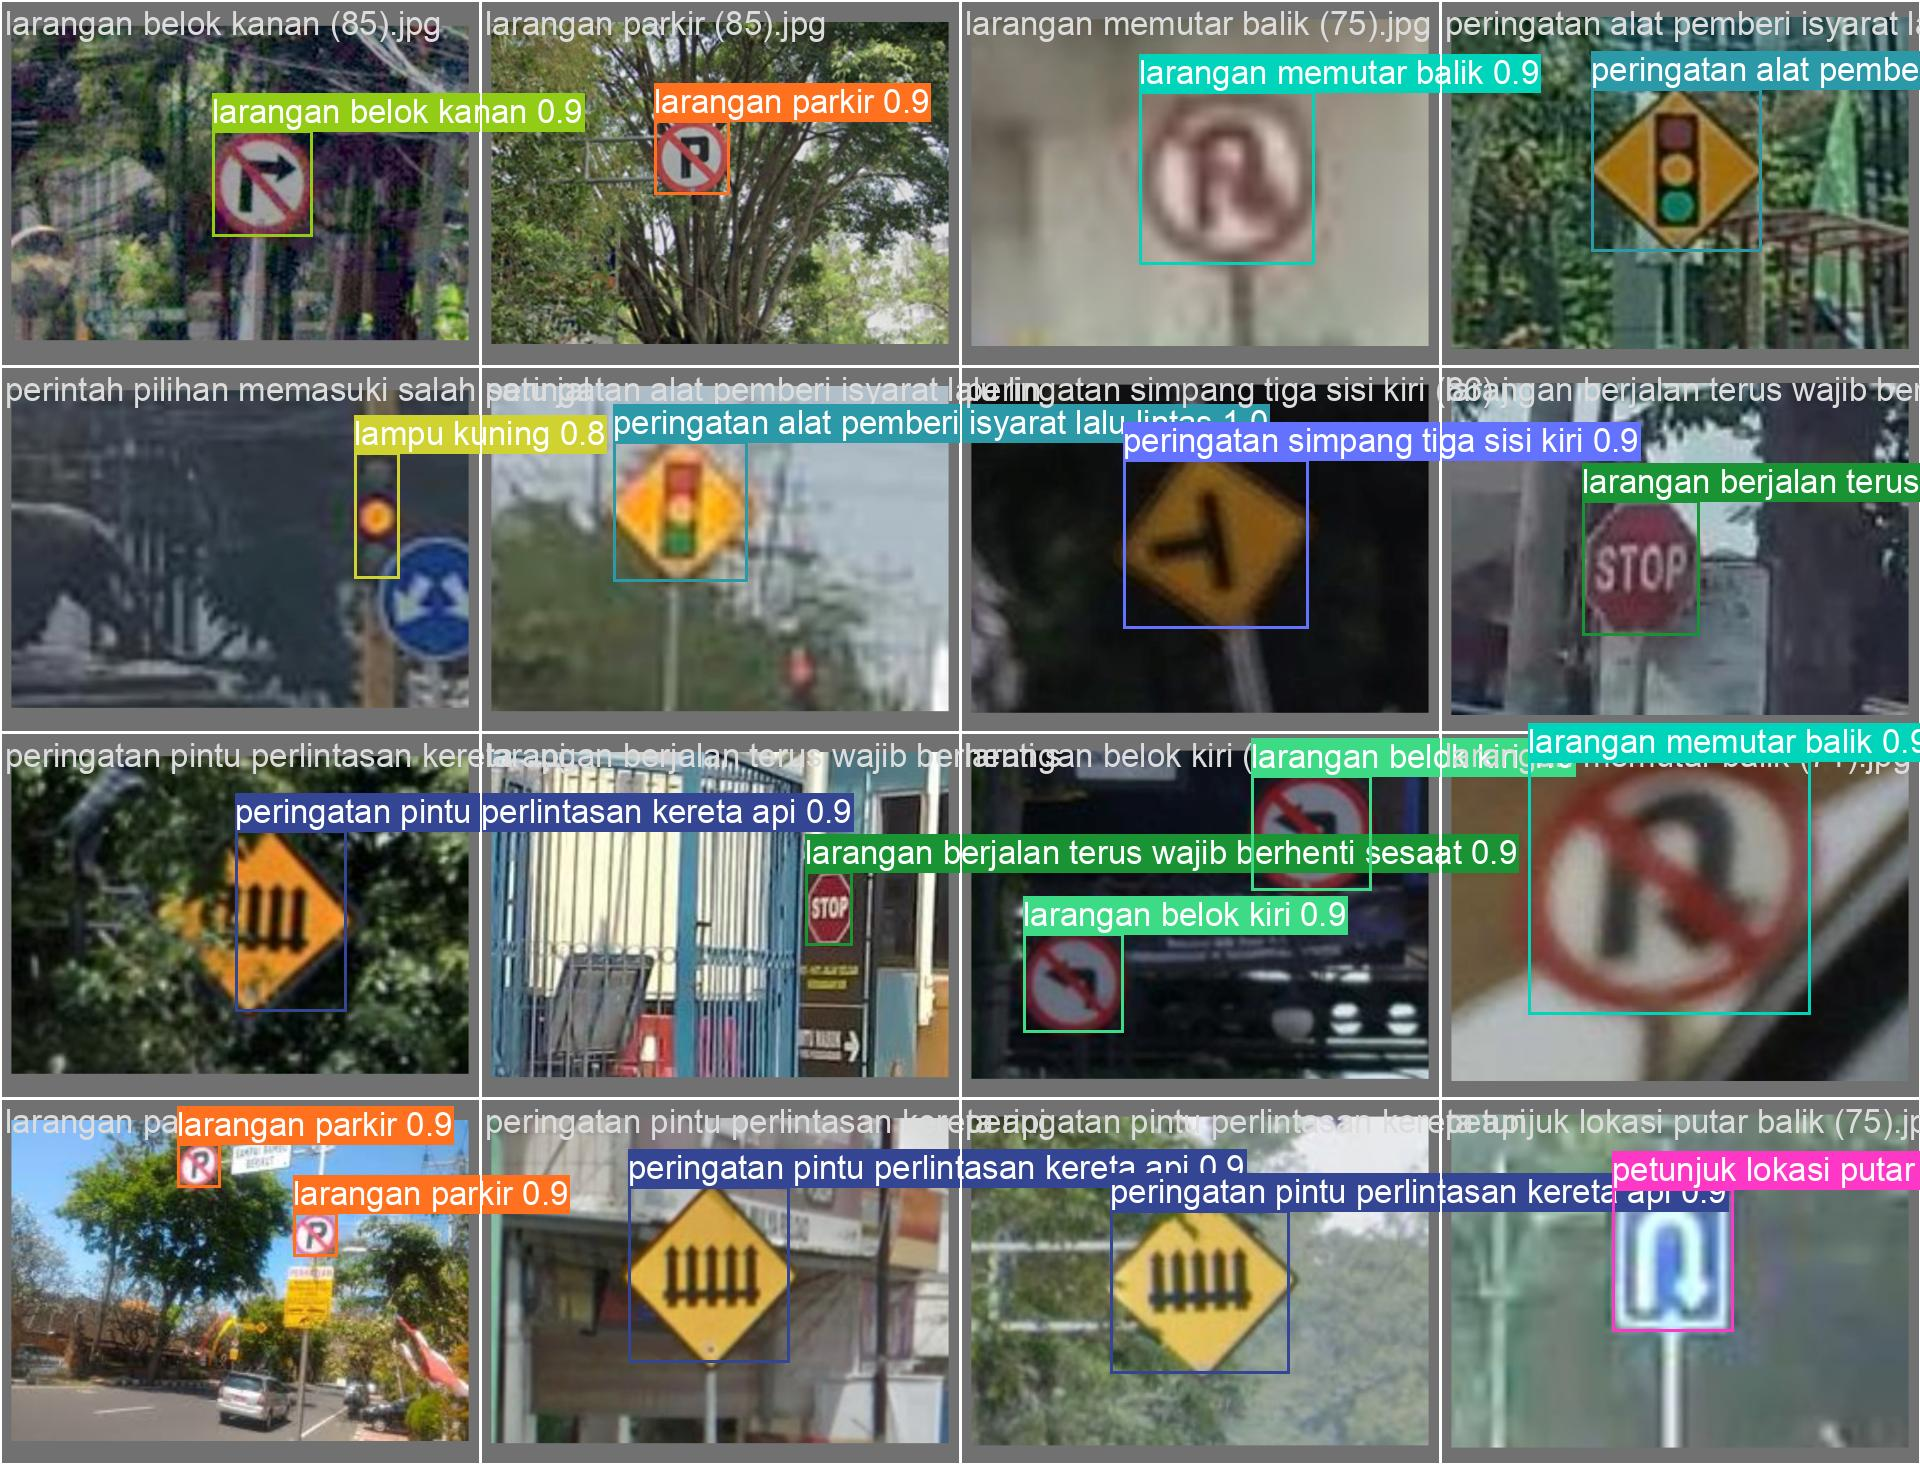

In [ ]:
Image(filename=f'runs/detect/train2/val_batch1_pred.jpg', width=1024)

### 6. Predict the test dataset

In [ ]:
## Load the best weight
model = YOLO("runs/detect/train2/weights/best.pt")

In [ ]:
# predict
predict_result = model.predict(source='images/test', conf=0.25, save=True)


image 1/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (100).jpg: 512x640 1 lampu hijau, 91.9ms
image 2/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (90).jpg: 288x640 2 lampu hijaus, 98.8ms


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 3/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (91).jpg: 640x448 1 lampu hijau, 125.4ms
image 4/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (92).jpg: 640x448 1 lampu hijau, 27.3ms
image 5/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (93).jpg: 640x416 1 lampu hijau, 91.7ms
image 6/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (94).jpg: 448x640 1 lampu hijau, 81.3ms
image 7/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (95).jpg: 640x448 1 lampu hijau, 28.6ms
image 8/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (96).jpg: 256x640 1 lampu hijau, 96.3ms
image 9/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (97).jpg: 640x480 1 lampu hijau, 71.6ms
image 10/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (98).jpg: 640x

### 7. Sampling the predict result

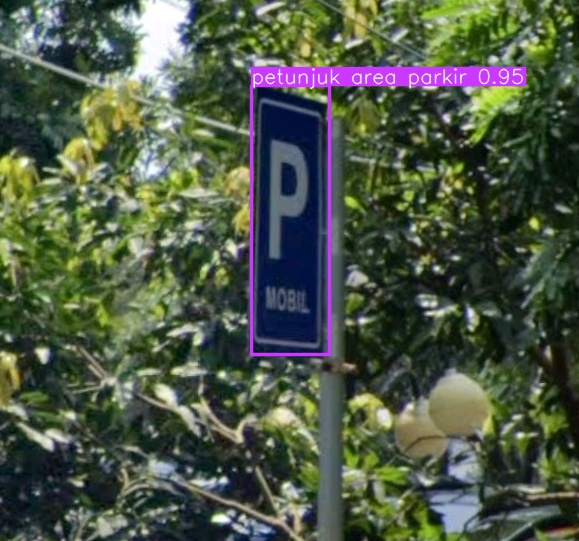

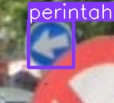

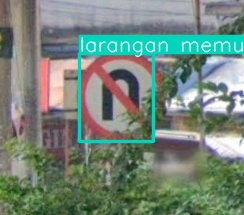

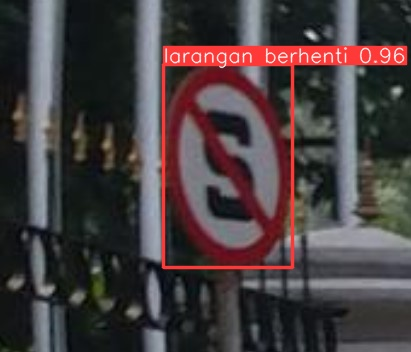

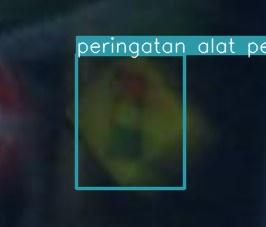

In [ ]:
import glob, random
from IPython.display import Image, display

for image_path in random.choices(glob.glob(f'runs/detect/predict/*.jpg'), k=5):
      display(Image(filename=image_path, width=300))
      print("\n")

In [ ]:
model = YOLO("runs/detect/train2/weights/last.pt")

In [ ]:
!ls

'Detect Rambu'				 'detect rambu - train-8s-Auto.ipynb'   yolov8s.pt
'Detect Rambu-20240612T125847Z-001.zip'   runs
'detect rambu - train-8s-Adam.ipynb'	  yolov8n.pt


### 5. Train the dataset with 100 epoch, imagesize 640 and batch 8

In [ ]:
model = YOLO("yolov8s.pt")
model.train(data='/content/drive/MyDrive/Final Project/Detect Rambu/dataset.yaml', epochs=100, imgsz=640, device=0, batch=8, optimizer='Adam', lr0=0.0001)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Final Project/Detect Rambu/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/train.cache... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G      1.007      2.858      1.216         17        640: 100%|██████████| 184/184 [09:47<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.70it/s]

                   all        399        429      0.616      0.482      0.472      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G     0.9182      1.637      1.126          6        640: 100%|██████████| 184/184 [00:55<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]

                   all        399        429      0.635      0.696      0.693      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.39G     0.8457      1.253      1.071         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.40it/s]

                   all        399        429      0.766      0.784      0.837       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G     0.7899      1.041      1.054          9        640: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.31it/s]

                   all        399        429      0.851      0.851      0.891      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.4G     0.7845     0.9184       1.04         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.55it/s]


                   all        399        429      0.885      0.869      0.906      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G     0.7582     0.8102      1.023          9        640: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]

                   all        399        429      0.905      0.902      0.941      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G     0.7429     0.7763      1.016          6        640: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

                   all        399        429      0.922       0.86      0.937      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.38G     0.7484     0.7438      1.025         11        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]

                   all        399        429      0.895      0.895      0.925      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.38G     0.7251     0.6953      1.016          6        640: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]

                   all        399        429      0.927      0.901      0.951      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G     0.7163     0.6971      1.007          6        640: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]

                   all        399        429      0.929      0.904      0.959      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.38G     0.7113     0.6549      1.007         10        640: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.62it/s]

                   all        399        429      0.924      0.926      0.952      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.38G     0.6917     0.6045      1.001         16        640: 100%|██████████| 184/184 [00:44<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.36it/s]

                   all        399        429      0.941      0.903      0.959      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G     0.6889     0.6123     0.9961          7        640: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.11it/s]

                   all        399        429      0.892       0.91      0.949      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.41G     0.6819      0.606     0.9912         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        399        429      0.908      0.904      0.947      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.4G     0.6786     0.5934     0.9929         14        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        399        429      0.934      0.913      0.948        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.38G     0.6651     0.5588     0.9945          9        640: 100%|██████████| 184/184 [00:48<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.03it/s]

                   all        399        429      0.953      0.901      0.949      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G     0.6738     0.5588     0.9917          6        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]

                   all        399        429      0.906       0.91      0.948        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.38G     0.6513     0.5361     0.9741          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

                   all        399        429      0.928      0.909      0.948      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.39G     0.6576     0.5401     0.9808         12        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]

                   all        399        429      0.925      0.918      0.934      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G     0.6467     0.5138     0.9813         12        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.30it/s]

                   all        399        429       0.95      0.925      0.957       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.39G     0.6415     0.5101     0.9677          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all        399        429      0.964        0.9      0.953      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.39G     0.6394     0.5103     0.9768          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.37it/s]

                   all        399        429      0.957      0.924      0.958      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.39G     0.6348     0.5032     0.9687          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]

                   all        399        429       0.95        0.9      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.38G     0.6284     0.5058     0.9803         12        640: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.48it/s]

                   all        399        429      0.929      0.913       0.94      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.39G     0.6164     0.4869     0.9592          7        640: 100%|██████████| 184/184 [00:44<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.28it/s]

                   all        399        429      0.967      0.906      0.958      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.37G      0.615      0.481     0.9646         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.71it/s]

                   all        399        429      0.939       0.93       0.95      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.38G     0.6198      0.478     0.9642         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.40it/s]

                   all        399        429      0.949      0.913      0.952      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.4G     0.6235     0.4817     0.9651          6        640: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]

                   all        399        429      0.955      0.914      0.955      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G     0.6101     0.4708     0.9662          9        640: 100%|██████████| 184/184 [00:45<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.91it/s]

                   all        399        429      0.925      0.923      0.947      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.39G     0.5884     0.4418     0.9508          8        640: 100%|██████████| 184/184 [00:50<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.02it/s]

                   all        399        429      0.948      0.926      0.965      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.41G     0.5966     0.4653     0.9508         15        640: 100%|██████████| 184/184 [00:48<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.18it/s]


                   all        399        429      0.944      0.921      0.959      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.39G     0.5939     0.4437     0.9565         11        640: 100%|██████████| 184/184 [00:54<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]

                   all        399        429      0.936      0.936      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.38G     0.5897     0.4488     0.9474          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]

                   all        399        429      0.946      0.935      0.968      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.38G     0.5857     0.4564     0.9587         12        640: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]

                   all        399        429      0.951      0.934      0.966      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.38G     0.5825     0.4371     0.9473         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]

                   all        399        429      0.951      0.916      0.965      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.38G     0.5762     0.4274     0.9421         11        640: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]


                   all        399        429      0.957      0.941       0.97      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.39G      0.582     0.4332     0.9512          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.75it/s]

                   all        399        429      0.943       0.93      0.959      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G     0.5749     0.4383     0.9487         16        640: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.30it/s]

                   all        399        429      0.958      0.919      0.956      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.4G     0.5725     0.4268      0.947         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.54it/s]

                   all        399        429      0.956      0.935      0.967      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G     0.5655     0.4151     0.9392          7        640: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]

                   all        399        429      0.956      0.932      0.967      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.38G     0.5745     0.4194     0.9441          9        640: 100%|██████████| 184/184 [00:48<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]

                   all        399        429      0.966      0.927      0.964      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.4G     0.5733     0.4181     0.9453         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]

                   all        399        429      0.953      0.934      0.959      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.5575     0.4096     0.9475         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]

                   all        399        429      0.954      0.932      0.965      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.39G     0.5473     0.3917     0.9384         13        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

                   all        399        429      0.944      0.931      0.962       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.38G     0.5507     0.4041     0.9342         15        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]

                   all        399        429      0.951      0.942      0.966      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.39G     0.5385     0.3904     0.9349          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.30it/s]

                   all        399        429      0.944      0.937      0.965      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.39G     0.5599     0.4045     0.9436         10        640: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.98it/s]

                   all        399        429      0.937      0.937      0.963      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.38G     0.5441     0.3924     0.9383         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]

                   all        399        429      0.929      0.942      0.966       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.38G     0.5425     0.3923     0.9369          6        640: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        399        429      0.963      0.918      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.38G     0.5288      0.383     0.9298          6        640: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.84it/s]

                   all        399        429      0.953      0.934      0.965       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.38G     0.5404     0.3917     0.9366         11        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.54it/s]

                   all        399        429      0.956      0.944      0.967      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.39G     0.5509     0.3868     0.9395          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]

                   all        399        429      0.941      0.929      0.966      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.39G     0.5358     0.3983     0.9397         12        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.00it/s]

                   all        399        429      0.945       0.92      0.961      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.38G     0.5403     0.3919     0.9358         10        640: 100%|██████████| 184/184 [00:48<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.92it/s]

                   all        399        429      0.959      0.907      0.955      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.38G     0.5314     0.3841     0.9294         13        640: 100%|██████████| 184/184 [00:54<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]

                   all        399        429      0.943      0.937      0.961      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.38G     0.5135     0.3727     0.9225          9        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.95it/s]


                   all        399        429      0.958      0.931      0.963      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.38G     0.5029     0.3577     0.9238          7        640: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.34it/s]

                   all        399        429      0.964      0.914      0.965       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.39G     0.5135     0.3556     0.9245         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]

                   all        399        429       0.95      0.925      0.961      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.38G     0.4975     0.3563     0.9238          9        640: 100%|██████████| 184/184 [00:51<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        399        429      0.944      0.934      0.963      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.38G      0.506     0.3617     0.9242          8        640: 100%|██████████| 184/184 [00:49<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]

                   all        399        429      0.936      0.947      0.968      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.39G     0.5078     0.3642     0.9242          8        640: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]

                   all        399        429      0.947      0.943      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.38G     0.5014     0.3555     0.9168         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.46it/s]

                   all        399        429      0.951      0.931      0.962      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.4914     0.3555      0.913         11        640: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.70it/s]

                   all        399        429      0.946      0.936      0.963      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.38G     0.4981     0.3497     0.9207         12        640: 100%|██████████| 184/184 [00:45<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]

                   all        399        429      0.947      0.926      0.961      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.39G     0.4894     0.3393     0.9173         16        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.66it/s]

                   all        399        429      0.945      0.928      0.964      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.39G      0.492     0.3628     0.9134          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        399        429      0.948      0.935      0.966      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.39G      0.477      0.332     0.9121          8        640: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.43it/s]

                   all        399        429      0.957      0.936      0.966      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.38G     0.4797     0.3445     0.9183          6        640: 100%|██████████| 184/184 [00:45<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]

                   all        399        429      0.958      0.935       0.97       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.4913     0.3462     0.9247         10        640: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        399        429      0.959      0.931      0.969      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G     0.4839     0.3299     0.9099          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]

                   all        399        429      0.944      0.939      0.964      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.4G     0.4878     0.3402     0.9171         10        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.55it/s]

                   all        399        429      0.958      0.921      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.38G     0.4836     0.3393      0.917         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.53it/s]

                   all        399        429      0.959       0.93      0.963       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.4G     0.4765     0.3394     0.9121         11        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.01it/s]

                   all        399        429      0.946      0.933      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.38G     0.4733     0.3251     0.9119         13        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.97it/s]

                   all        399        429      0.957      0.924      0.962      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.39G     0.4698     0.3286     0.9106         14        640: 100%|██████████| 184/184 [00:53<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]

                   all        399        429      0.964      0.922      0.962      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.39G     0.4624     0.3376     0.9088         12        640: 100%|██████████| 184/184 [00:48<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.04it/s]

                   all        399        429      0.961      0.926      0.966      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.4687     0.3279     0.9135         11        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]

                   all        399        429      0.951      0.926      0.961      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.38G       0.47     0.3274     0.9141         15        640: 100%|██████████| 184/184 [00:45<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        399        429      0.943      0.933      0.964      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.39G     0.4656     0.3251     0.9093         10        640: 100%|██████████| 184/184 [00:53<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]

                   all        399        429      0.965       0.92      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.38G     0.4619     0.3267     0.9119         13        640: 100%|██████████| 184/184 [00:48<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


                   all        399        429      0.964      0.922      0.963       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.38G     0.4563     0.3121     0.9061          7        640: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]

                   all        399        429       0.96       0.93      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.39G     0.4539     0.3179     0.9008         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]

                   all        399        429      0.948      0.938      0.966      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.39G     0.4507     0.3213     0.9026         10        640: 100%|██████████| 184/184 [00:52<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]

                   all        399        429      0.937      0.943      0.963       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.38G     0.4609     0.3161     0.9077          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]

                   all        399        429      0.947      0.947      0.967      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.4513     0.3188     0.9087          8        640: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.44it/s]

                   all        399        429      0.938      0.947      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.38G     0.4481     0.3029     0.8983         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]

                   all        399        429      0.934      0.955      0.967      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.4G     0.4512     0.3091     0.9079          6        640: 100%|██████████| 184/184 [00:51<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.37it/s]

                   all        399        429      0.943       0.94      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.38G     0.4404     0.3029     0.8994         11        640: 100%|██████████| 184/184 [00:48<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]

                   all        399        429      0.952      0.935      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.4466     0.3127     0.9042          8        640: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.50it/s]

                   all        399        429       0.95       0.93      0.963       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.39G     0.4598     0.3128     0.9091          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        399        429       0.94      0.943      0.963      0.831


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.38G     0.3772      0.214     0.8398          5        640: 100%|██████████| 184/184 [00:48<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.57it/s]

                   all        399        429      0.936      0.945       0.96      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.39G     0.3707     0.2063     0.8317          7        640: 100%|██████████| 184/184 [00:44<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]

                   all        399        429      0.949      0.933       0.96      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.4G     0.3657      0.205     0.8297          5        640: 100%|██████████| 184/184 [00:48<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]

                   all        399        429      0.953      0.929      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.38G     0.3671     0.2058     0.8281          5        640: 100%|██████████| 184/184 [00:43<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.92it/s]

                   all        399        429       0.95      0.932      0.963      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.38G     0.3656     0.2029     0.8275          5        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.40it/s]

                   all        399        429      0.943      0.942      0.961      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.4G     0.3633     0.1995     0.8319          5        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

                   all        399        429      0.965      0.928      0.963      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.4G     0.3617     0.1991     0.8254          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.54it/s]

                   all        399        429      0.969      0.926      0.963      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.38G     0.3556     0.1993     0.8298          5        640: 100%|██████████| 184/184 [00:44<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        399        429       0.97      0.923      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.39G     0.3556      0.199     0.8346          5        640: 100%|██████████| 184/184 [00:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]

                   all        399        429      0.943      0.946      0.963      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.38G     0.3531     0.1961     0.8253          5        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]

                   all        399        429      0.969      0.924      0.963      0.831



100 epochs completed in 1.769 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:15<00:00,  1.60it/s]


                   all        399        429      0.938      0.947      0.968      0.835
     larangan berhenti         19         19      0.972          1      0.995      0.964
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19      0.976          1      0.995      0.935
       larangan parkir         19         20      0.902       0.92      0.962      0.866
           lampu hijau         19         35      0.969      0.893      0.986       0.78
          lampu kuning         19         19      0.742      0.842       0.83      0.613
           lampu merah         19         19      0.746      0.684      0.793      0.583
  larangan belok kanan         19         20      0.885        0.9      0.961       0.91
   larangan belok kiri         19         23      0.822      0.957      0.986      0.903
larangan berjalan terus wajib berhenti sesaat         19         23      0.934      0.957      0.968      0.794
larangan memutar balik         19         19        

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4416cb5330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [8]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Final Project/runs/detect/train4/weights/best.pt' data='/content/drive/MyDrive/Final Project/Detect Rambu/dataset_for_testing.yaml'

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/15v3s3Y2UKsJjSn-U55SQwBlRnIHhK5mn/Final Project/Detect Rambu/labels/test.cache... 231 images, 0 backgrounds, 0 corrupt: 100% 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:06<00:00,  2.34it/s]
                   all        231        242       0.96      0.954      0.981      0.853
     larangan berhenti         11         11          1      0.881      0.923      0.821
larangan masuk bagi kendaraan bermotor dan tidak bermotor         11         11      0.985          1      0.995      0.937
       larangan parkir         11         14          1      0.753       0.96      0.828
           lampu hijau         11         12      0.962          1      0.995      0.846
          lampu kuning 